In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from datetime import datetime, timedelta
from pandas import read_csv
import seaborn as sns

In [3]:
import pandas

In [4]:
# https://stackoverflow.com/questions/29853390/python-trouble-converting-milliseconds-to-datetime-and-back
def mil_to_date(mil):
    """date items from REST services are reported in milliseconds,
    this function will convert milliseconds to datetime objects

    Required:
        mil -- time in milliseconds
    """
    if mil == None:
        return None
    elif mil < 0:
        return datetime.utcfromtimestamp(0) + timedelta(seconds=(mil/1000))
    else:
        return datetime.fromtimestamp(mil / 1000)

In [5]:
types = {'hours':int,'days':int,'lat':float,'lon':float,'start':long,'duration':float}
data = read_csv("busstops.csv",dtype=types)
data.describe()

,hours,days,lat,lon,start,duration
count,24367.000000,24367.000000,24367.000000,24367.000000,2.436700e+04,24367.000000
mean,14.293348,2.988632,52.211471,5.781820,1.485070e+12,25.402875
std,4.984023,1.988556,0.004614,0.008137,1.064820e+09,680.269029
min,0.000000,0.000000,52.197387,5.716894,1.483255e+12,0.009000
25%,11.000000,1.000000,52.207324,5.775213,1.484132e+12,6.000000
50%,14.000000,3.000000,52.212546,5.780913,1.485091e+12,12.800000
75%,18.000000,5.000000,52.215812,5.790322,1.486050e+12,20.202000
max,23.000000,6.000000,52.217711,5.802556,1.487004e+12,72539.543000


In [6]:
data['start_utc'] = data.start.apply(mil_to_date)

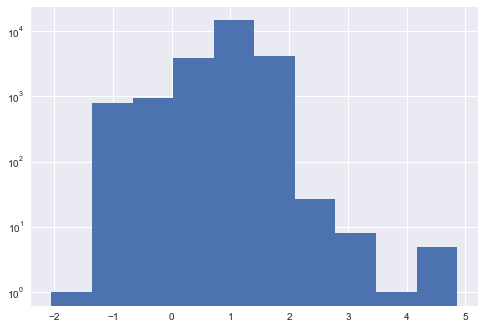

In [7]:
data.duration.apply(np.log10).hist(log=True)

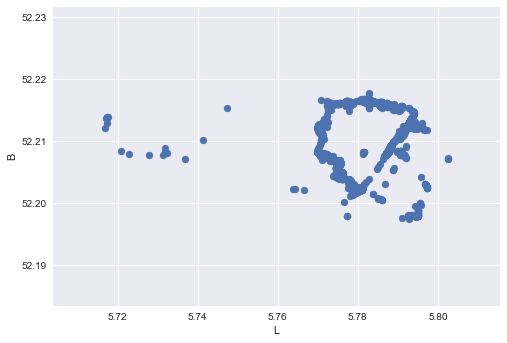

In [8]:
fig, ax = plt.subplots(ncols=1,nrows=1)
ax.scatter(x=data.lon,y=data.lat)
ax.set_xlabel("L")
ax.set_ylabel("B")

In [9]:
data_monday = data.loc[data.days==1]

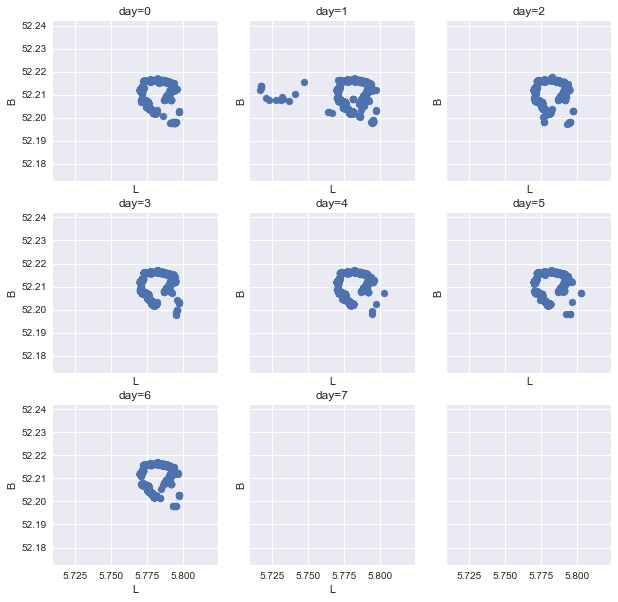

In [10]:
fig, axes = plt.subplots(ncols=3,nrows=3,sharex=True,sharey=True,figsize=(10,10))
for i in range(0,8):
    ax = axes.flatten()[i]
    my_data = data.loc[data.days==i]
    ax.scatter(x=my_data.lon,y=my_data.lat)
    ax.set_xlabel("L")
    ax.set_ylabel("B")
    ax.set_title("day=%i"%i)

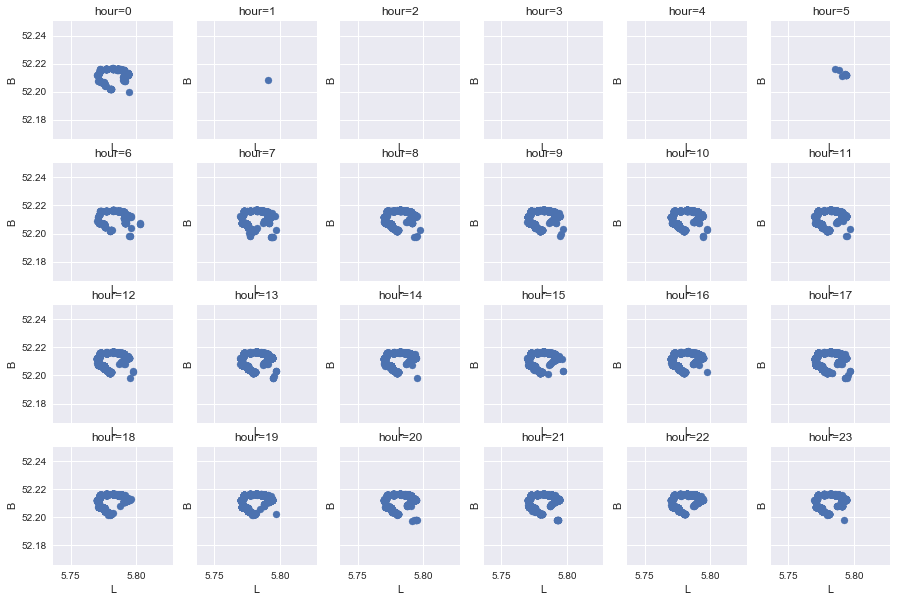

In [11]:
fig, axes = plt.subplots(ncols=6,nrows=4,sharex=True,sharey=True,figsize=(15,10))
for i in range(0,24):
    ax = axes.flatten()[i]
    my_data = data.loc[(data.hours==i) & (data.days!=1)]
    ax.scatter(x=my_data.lon,y=my_data.lat)
    ax.set_xlabel("L")
    ax.set_ylabel("B")
    ax.set_title("hour=%i"%i)

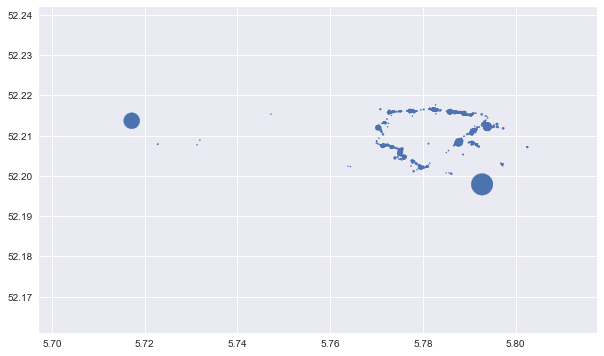

In [12]:
fig, ax = plt.subplots(ncols=1,nrows=1,figsize=(10,6))
# exclude biggest value
mf = data.loc[(data.duration <= 1e4) & (data.duration > 10)]
ax.scatter(x=mf.lon,y=mf.lat,s=mf.duration/10.)

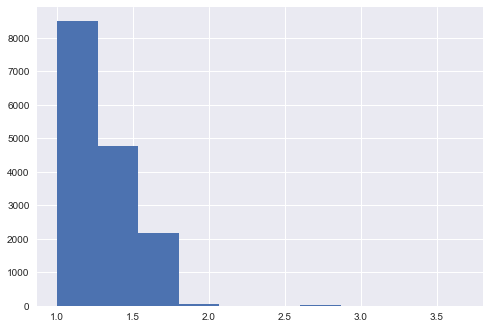

In [13]:
mf.duration.apply(np.log10).hist()

In [14]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
hours,24367.0,1.429335e+01,4.984023e+00,0.000000e+00,1.100000e+01,1.400000e+01,1.800000e+01,2.300000e+01
days,24367.0,2.988632e+00,1.988556e+00,0.000000e+00,1.000000e+00,3.000000e+00,5.000000e+00,6.000000e+00
lat,24367.0,5.221147e+01,4.614450e-03,5.219739e+01,5.220732e+01,5.221255e+01,5.221581e+01,5.221771e+01
lon,24367.0,5.781820e+00,8.137388e-03,5.716894e+00,5.775213e+00,5.780913e+00,5.790322e+00,5.802556e+00
start,24367.0,1.485070e+12,1.064820e+09,1.483255e+12,1.484132e+12,1.485091e+12,1.486050e+12,1.487004e+12
duration,24367.0,2.540287e+01,6.802690e+02,9.000000e-03,6.000000e+00,1.280000e+01,2.020200e+01,7.253954e+04


In [15]:
data.head()

,hours,days,lat,lon,start,duration,start_utc
0,6,1,52.207736,5.791569,1483336223986,2.2,2017-01-02 06:50:23
1,6,1,52.207782,5.791516,1483336230686,4.9,2017-01-02 06:50:30
2,6,1,52.212397,5.793555,1483336517288,5.1,2017-01-02 06:55:17
3,6,1,52.212397,5.793555,1483336525888,1.8,2017-01-02 06:55:25
4,6,1,52.215228,5.790602,1483336610688,1.2,2017-01-02 06:56:50


In [16]:
data['prob'] = 0.

In [16]:
data = data.set_index("start_utc")

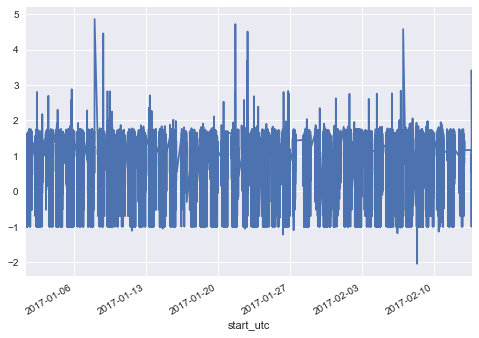

In [17]:
data.duration.apply(np.log10).plot()

In [18]:
# short stops - remove outliers

In [19]:
data_short = data.loc[ ( np.log10(data.duration) < 2.0 ) & (data.duration > 10.)] 

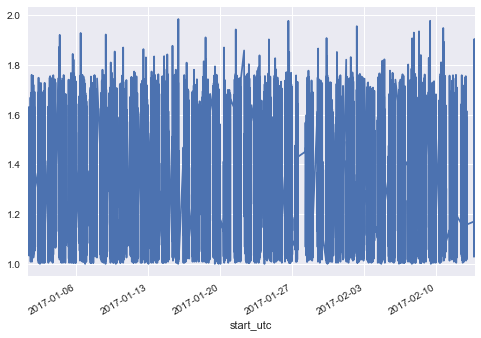

In [20]:
data_short.duration.apply(np.log10).plot()

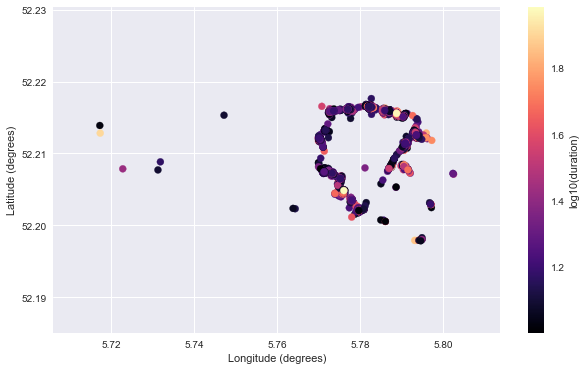

In [21]:
fig, ax = plt.subplots(ncols=1,nrows=1,figsize=(10,6))
z = ax.scatter(x=data_short.lon,y=data_short.lat, c = np.log10(data_short.duration),cmap='magma')
ax.set_xlabel("Longitude (degrees)")
ax.set_ylabel("Latitude (degrees)")
plt.colorbar(z,label='log10(duration)')

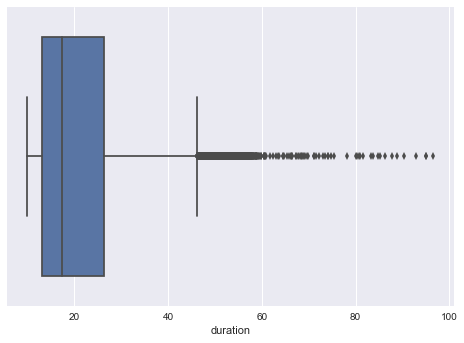

In [23]:
#sns.set_style("whitegrid")
#sns.set_context("paper")

#data_short.duration.apply(np.log10).hist()
sns.boxplot(data_short.duration)

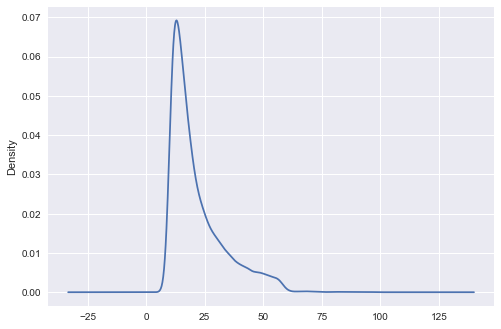

In [24]:
data_short.duration.plot(kind='kde')


In [25]:
def get_subset_by_IQR(df,column,q1=0.25,q2=0.75):
    q1 = df[column].quantile(q1)
    q3 = df[column].quantile(q2)
    iqr = (df[column] > q1) & (df[column] < q3)
    return df.loc[iqr]

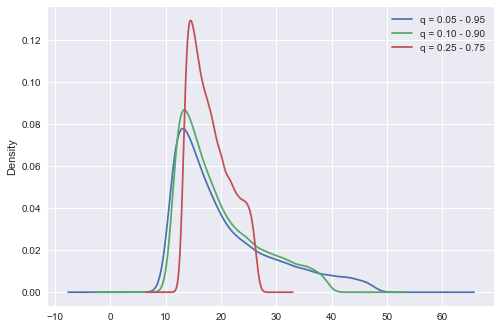

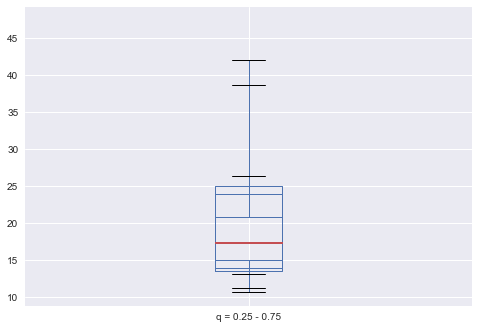

In [29]:
data_clean = get_subset_by_IQR(data_short,'duration',q1=0.25,q2=0.75)
ax, fig = plt.subplots(ncols=1,nrows=1)
get_subset_by_IQR(data_short,'duration',q1=0.05,q2=0.95).duration.plot(kind='kde',label='q = 0.05 - 0.95')
get_subset_by_IQR(data_short,'duration',q1=0.10,q2=0.90).duration.plot(kind='kde',label='q = 0.10 - 0.90')
get_subset_by_IQR(data_short,'duration',q1=0.25,q2=0.75).duration.plot(kind='kde',label='q = 0.25 - 0.75')
plt.legend()

ax, fig = plt.subplots(ncols=1,nrows=1)

a1=get_subset_by_IQR(data_short,'duration',q1=0.05,q2=0.95).duration.plot(kind='box',label='q = 0.05 - 0.95')
a2=get_subset_by_IQR(data_short,'duration',q1=0.10,q2=0.90).duration.plot(kind='box',label='q = 0.10 - 0.90')
a3=get_subset_by_IQR(data_short,'duration',q1=0.25,q2=0.75).duration.plot(kind='box',label='q = 0.25 - 0.75')







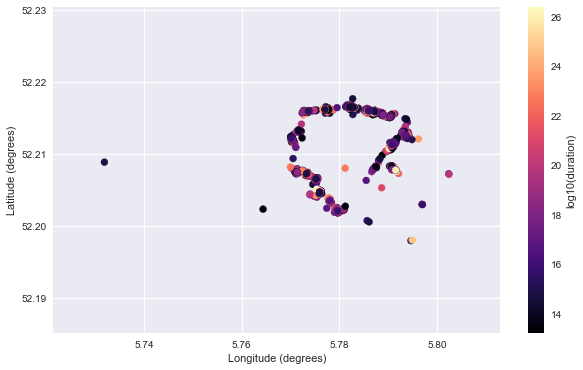

In [30]:
fig, ax = plt.subplots(ncols=1,nrows=1,figsize=(10,6))
z = ax.scatter(x=data_clean.lon,y=data_clean.lat, c = data_clean.duration,cmap='magma')
ax.set_xlabel("Longitude (degrees)")
ax.set_ylabel("Latitude (degrees)")
plt.colorbar(z,label='log10(duration)')

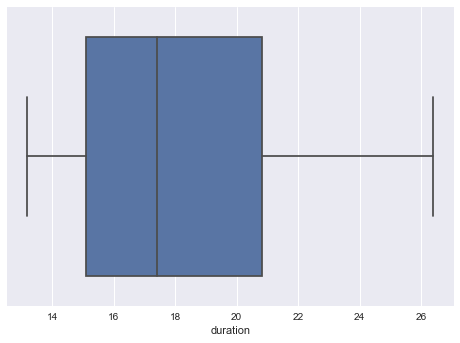

In [31]:
sns.boxplot(data_clean.duration)

In [34]:
df = data_clean.drop('start',axis=1).drop('lat',axis=1).drop('lon',axis=1)


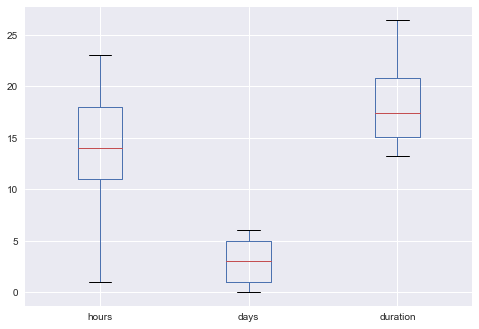

In [35]:
df.plot(kind='box')

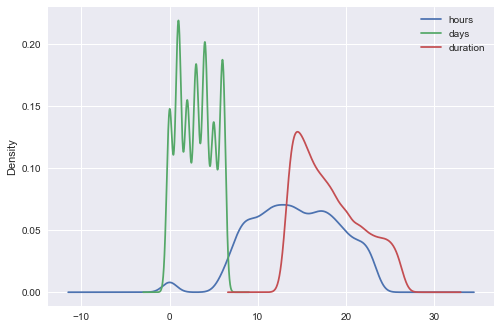

In [36]:
df.plot(kind='kde')